# 4. Naive Bayes

In [38]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random

<hr>

## 1. Import data and functions

In [39]:
%run functions/functions.ipynb
%run #0-LoadingData.ipynb

Loaded: 
 - partition(X, y, percent_train = 0.8), 
 - Xy_dataloader(X_numpy, y_numpy, batch_size=32)
Pandas_ML_Project_SNR_Minus10
Pandas_ML_Project_SNR_Minus15
Pandas_ML_Project_SNR_Minus20
Pandas_ML_Project_SNR_Minus25
Pandas_ML_Project_SNR_Minus5
Data loaded
Example: X, y = data['Pandas_ML_Project_SNR_Minus5']['x'], data['Pandas_ML_Project_SNR_Minus5']['y']


In [40]:
X, y = data['Pandas_ML_Project_SNR_Minus5']['x'], data['Pandas_ML_Project_SNR_Minus5']['y']

<hr>

## 2. Model

In [5]:
# Calculate Gaussian parameters mu and sigma for each attribute over a dataset

def get_gaussian_parameters(X, y):
    parameters = {}
    unique_y = np.unique(y)
    for uy in unique_y:
        mean = np.mean(X[y==uy], axis=0)
        std = np.std(X[y==uy], axis=0)
        py = y[y==uy].size / y.size
        parameters[uy] = { 'prior': py, 'mean': mean, 'std': std }
    return parameters, unique_y

def calculateProbability(x, mu, sigma):
    sigma = np.diag(sigma**2)
    x = x.reshape(-1,1)
    mu = mu.reshape(-1,1)
    exponent = np.exp(-1/2*(x-mu).T@np.linalg.inv(sigma)@(x-mu))
    return ((1/(np.sqrt(((2*np.pi)**x.size)*np.linalg.det(sigma))))*exponent)[0,0]

# Calculate class conditional probabilities for given input data vector

def predict_one(x, parameters, unique_y, prior=True):
    probabilities = []
    for key in parameters.keys():
        probabilities.append(calculateProbability(x, parameters[key]['mean'], 
                                                  parameters[key]['std']) * (parameters[key]['prior']**(float(prior))))
    probabilities = np.array(probabilities)
    return unique_y[np.argmax(probabilities)]

def getPredictions(X, parameters, unique_y,prior=True):
    predictions = []
    for i in range(X.shape[0]):
        predictions.append(predict_one(X[i],parameters,unique_y,prior))
    return np.array(predictions)

# Get accuracy for test set

def getAccuracy(y, y_pred):
    correct = len(y[y==y_pred])
    return correct/y.size

In [6]:
#train test split
idx, X_train, y_train, X_test, y_test = partition(X, y, percent_train=0.8)

(8000, 11) (8000,) (2000, 11) (2000,)


<hr>

## 3. Training & Testing

### SR-5

In [7]:
# Train model

parameters, unique_y = get_gaussian_parameters(X_train,y_train)
prediction = getPredictions(X_test,parameters,unique_y)
print("Accuracy with Prior =",getAccuracy(y_test,prediction))

prediction = getPredictions(X_test,parameters,unique_y,prior = False)
print("Accuracy without Prior =",getAccuracy(y_test,prediction))

Accuracy with Prior = 1.0
Accuracy without Prior = 1.0


### SR-10

In [57]:
X, y = data['Pandas_ML_Project_SNR_Minus10']['x'], data['Pandas_ML_Project_SNR_Minus10']['y']
idx, X_train, y_train, X_test, y_test = partition(X, y, percent_train=0.8)
parameters, unique_y = get_gaussian_parameters(X_train,y_train)
prediction = getPredictions(X_test,parameters,unique_y)
print("Accuracy with Prior =",getAccuracy(y_test,prediction))

prediction = getPredictions(X_test,parameters,unique_y,prior = False)
print("Accuracy without Prior =",getAccuracy(y_test,prediction))

(8000, 2) (8000,) (2000, 2) (2000,)
Accuracy with Prior = 0.989
Accuracy without Prior = 0.989


### SR-15

In [58]:
X, y = data['Pandas_ML_Project_SNR_Minus15']['x'], data['Pandas_ML_Project_SNR_Minus15']['y']
idx, X_train, y_train, X_test, y_test = partition(X, y, percent_train=0.8)
parameters, unique_y = get_gaussian_parameters(X_train,y_train)
prediction = getPredictions(X_test,parameters,unique_y)
print("Accuracy with Prior =",getAccuracy(y_test,prediction))

prediction = getPredictions(X_test,parameters,unique_y,prior = False)
print("Accuracy without Prior =",getAccuracy(y_test,prediction))

(8000, 2) (8000,) (2000, 2) (2000,)
Accuracy with Prior = 0.79
Accuracy without Prior = 0.789


### SR-20

In [60]:
X, y = data['Pandas_ML_Project_SNR_Minus20']['x'], data['Pandas_ML_Project_SNR_Minus20']['y']
idx, X_train, y_train, X_test, y_test = partition(X, y, percent_train=0.8)
parameters, unique_y = get_gaussian_parameters(X_train,y_train)
prediction = getPredictions(X_test,parameters,unique_y)
print("Accuracy with Prior =",getAccuracy(y_test,prediction))

prediction = getPredictions(X_test,parameters,unique_y,prior = False)
print("Accuracy without Prior =",getAccuracy(y_test,prediction))

(8000, 2) (8000,) (2000, 2) (2000,)
Accuracy with Prior = 0.602
Accuracy without Prior = 0.6015


### SR-25

In [65]:
X, y = data['Pandas_ML_Project_SNR_Minus25']['x'], data['Pandas_ML_Project_SNR_Minus25']['y']
idx, X_train, y_train, X_test, y_test = partition(X, y, percent_train=0.8)
parameters, unique_y = get_gaussian_parameters(X_train,y_train)
prediction = getPredictions(X_test,parameters,unique_y)
print("Accuracy with Prior =",getAccuracy(y_test,prediction))

prediction = getPredictions(X_test,parameters,unique_y,prior = False)
print("Accuracy without Prior =",getAccuracy(y_test,prediction))

(8000, 2) (8000,) (2000, 2) (2000,)
Accuracy with Prior = 0.53
Accuracy without Prior = 0.5325


<hr>

# 4.1 Naive Bayes with Feature Selection

Reloading data with column selection. According to the correlation matrix below, we can notice that the most important features are: power, var_imaginary, var_real, range_imag, range_real

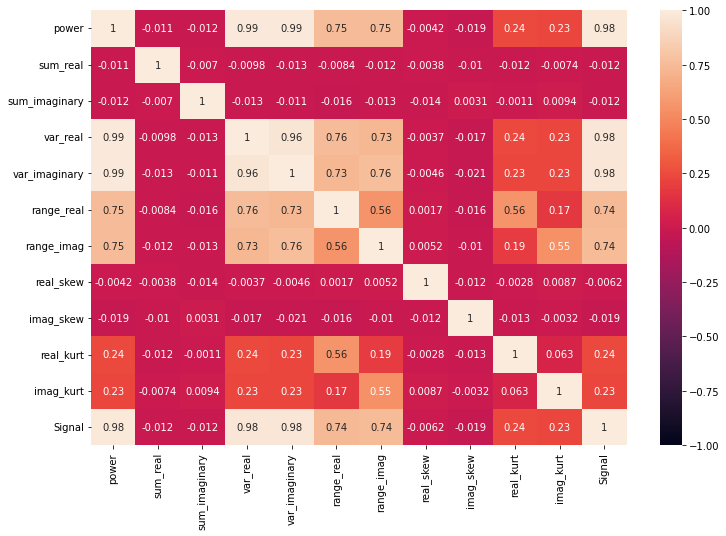

In [47]:
import seaborn as sns

filepath = '../data/Pandas_ML_Project_SNR_Minus5.csv' # go up one folder

data = pd.read_csv(filepath, delimiter=',', usecols=range(1, 13))

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

Importing data again with feature selection

In [48]:
cols = ["power", "var_imaginary", "var_real", "range_imag", "range_real", "Signal"]
data = load_data('../data', y_index=5, feature_selection=cols)

Training sor SNR-25

In [49]:
X, y = data['Pandas_ML_Project_SNR_Minus25']['x'], data['Pandas_ML_Project_SNR_Minus25']['y']
idx, X_train, y_train, X_test, y_test = partition(X, y, percent_train=0.8)
parameters, unique_y = get_gaussian_parameters(X_train,y_train)
prediction = getPredictions(X_test,parameters,unique_y)
print("Accuracy with Prior =",getAccuracy(y_test,prediction))

prediction = getPredictions(X_test,parameters,unique_y,prior = False)
print("Accuracy without Prior =",getAccuracy(y_test,prediction))

(8000, 5) (8000,) (2000, 5) (2000,)
Accuracy with Prior = 0.5265
Accuracy without Prior = 0.5265


Feature selection doesn't affect the accuracy much by selecting the most important ones, we still get ~53% acc with 5 features on 11

### Testing with 2 most important features

In [56]:
cols = ["power", "var_real", "Signal"]
data = load_data('../data', y_index=2, feature_selection=cols)

X, y = data['Pandas_ML_Project_SNR_Minus25']['x'], data['Pandas_ML_Project_SNR_Minus25']['y']
idx, X_train, y_train, X_test, y_test = partition(X, y, percent_train=0.8)
parameters, unique_y = get_gaussian_parameters(X_train,y_train)
prediction = getPredictions(X_test,parameters,unique_y)
print("Accuracy with Prior =",getAccuracy(y_test,prediction))

prediction = getPredictions(X_test,parameters,unique_y,prior = False)
print("Accuracy without Prior =",getAccuracy(y_test,prediction))

(8000, 2) (8000,) (2000, 2) (2000,)
Accuracy with Prior = 0.517
Accuracy without Prior = 0.517
